In [1]:
# Import necessary dependencies
import cv2
import numpy as np
import unittest
import sys
import os
import matplotlib.pyplot as plt

# Import the necessary classes
from detectors import YOLODetector

from segmentors import YoloSegmentor

from removers import BlurringRemover
from removers import OpenCvInpaintingRemover
from removers import LamaInpaintingRemover


from benard_supressor import BenardSupressor

# interactive notebook widgets
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [7]:
%matplotlib inline

In [3]:
# Let's import the test data

# 1. Load the test images
test_image1 = cv2.imread('_test_data/test1.jpg') 
test_image2 = cv2.imread('_test_data/test2.jpg')
test_image3 = cv2.imread('_test_data/test3.jpg')
test_image4 = cv2.imread('_test_data/test4.jpg')

images = [test_image1, test_image2, test_image3, test_image4]

In [4]:
# Let's test the perfomance of a Benard Supressor on the test images

detector = YOLODetector()
segmentor = YoloSegmentor()
remover = LamaInpaintingRemover()

benard_supressor = BenardSupressor(detector, segmentor, remover)

/users/eleves-b/2022/mathias.perez/Desktop/INF573-MakeBenardDisappear/ikomia_env/lib64/python3.9/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/users/eleves-b/2022/mathias.perez/Desktop/INF573-MakeBenardDisappear/ikomia_env/lib64/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/users/eleves-b/2022/mathias.perez/Desktop/INF573-MakeBenardDisappear/ikomia_env/lib64/python3.9/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/users/eleves-b/2022/mathias.perez/Desktop/INF573-MakeBenardDisappear/ikomia_env/lib64/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarnin

WARNING ⚠️ Python>=3.10 is required, but Python==3.9.18 is currently installed 


Workflow Untitled run successfully in 233.011405 ms.
Workflow Untitled run successfully in 232.08909 ms.
Workflow Untitled run successfully in 232.823771 ms.
Workflow Untitled run successfully in 231.19855 ms.


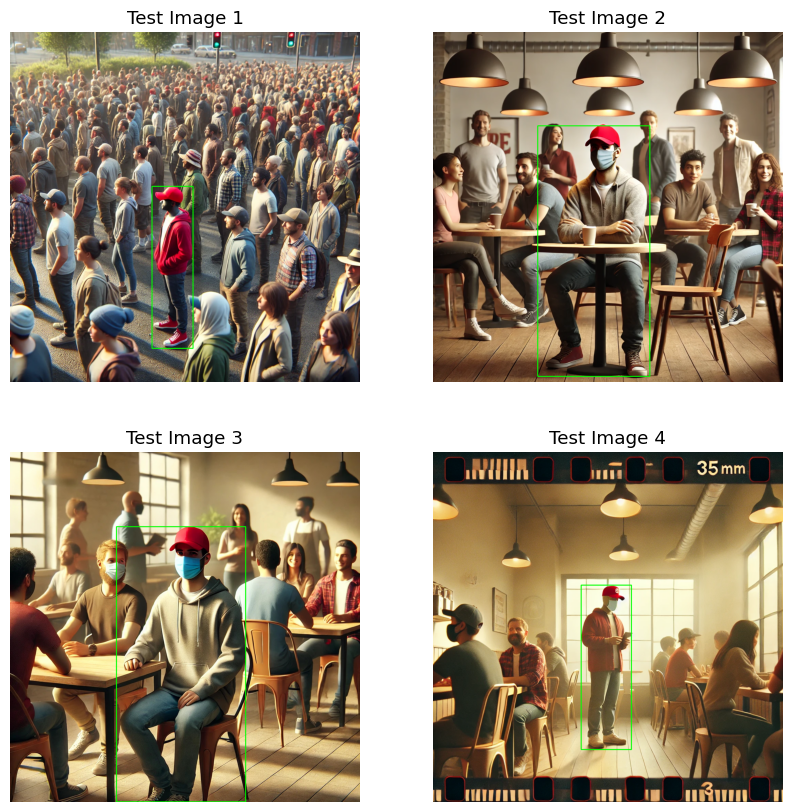

In [10]:
# Let's test the performances of the different parts of the Benard Supressor sequentially

# 1. Test the performance of the Detector
box1 = detector.detect(test_image1)
box2 = detector.detect(test_image2)
box3 = detector.detect(test_image3)
box4 = detector.detect(test_image4)

boxed_image1 = test_image1.copy()
for box in box1: # box is a list of 4 elements : x1, y1, w, h
    x, y, w, h = box
    cv2.rectangle(boxed_image1, (x, y), (x+w, y+h), (0, 255, 0), 2)
boxed_image2 = test_image2.copy()
for box in box2:
    x, y, w, h = box
    cv2.rectangle(boxed_image2, (x, y), (x+w, y+h), (0, 255, 0), 2)
boxed_image3 = test_image3.copy()
for box in box3:
    x, y, w, h = box
    cv2.rectangle(boxed_image3, (x, y), (x+w, y+h), (0, 255, 0), 2)
boxed_image4 = test_image4.copy()
for box in box4:
    x, y, w, h = box
    cv2.rectangle(boxed_image4, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Let's display the results in a unified manner
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(cv2.cvtColor(boxed_image1, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 0].set_title('Test Image 1')

axs[0, 1].imshow(cv2.cvtColor(boxed_image2, cv2.COLOR_BGR2RGB))
axs[0, 1].axis('off')
axs[0, 1].set_title('Test Image 2')

axs[1, 0].imshow(cv2.cvtColor(boxed_image3, cv2.COLOR_BGR2RGB))
axs[1, 0].axis('off')
axs[1, 0].set_title('Test Image 3')

axs[1, 1].imshow(cv2.cvtColor(boxed_image4, cv2.COLOR_BGR2RGB))
axs[1, 1].axis('off')
axs[1, 1].set_title('Test Image 4')

plt.show()


0: 640x640 1 person, 168.1ms
Speed: 1.7ms preprocess, 168.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Workflow Untitled run successfully in 400.642607 ms.

0: 640x640 2 persons, 1 cup, 194.5ms
Speed: 0.9ms preprocess, 194.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Workflow Untitled run successfully in 445.24308 ms.

0: 640x640 3 persons, 1 chair, 173.2ms
Speed: 0.8ms preprocess, 173.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Workflow Untitled run successfully in 420.950234 ms.

0: 640x640 1 person, 162.1ms
Speed: 0.8ms preprocess, 162.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Workflow Untitled run successfully in 409.346654 ms.


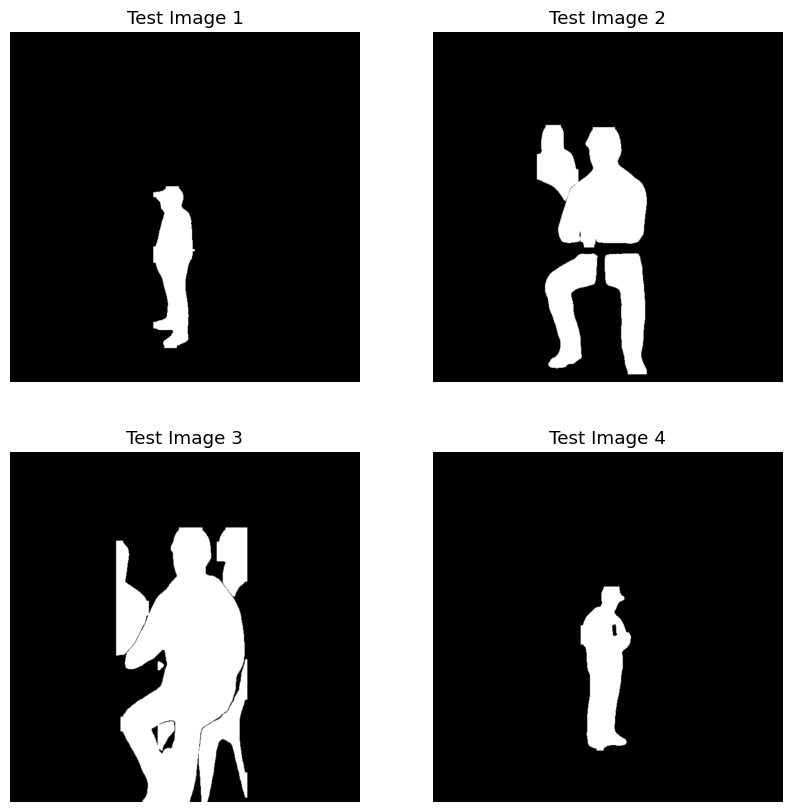

In [11]:
# 1. Test the performance of the Segmentor
mask1 = segmentor.segment(test_image1, box1)
mask2 = segmentor.segment(test_image2, box2)
mask3 = segmentor.segment(test_image3, box3)
mask4 = segmentor.segment(test_image4, box4)

# Let's display the results in a unified manner
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(mask1, cmap='gray')
axs[0, 0].axis('off')
axs[0, 0].set_title('Test Image 1')

axs[0, 1].imshow(mask2, cmap='gray')
axs[0, 1].axis('off')
axs[0, 1].set_title('Test Image 2')

axs[1, 0].imshow(mask3, cmap='gray')
axs[1, 0].axis('off')
axs[1, 0].set_title('Test Image 3')

axs[1, 1].imshow(mask4, cmap='gray')
axs[1, 1].axis('off')
axs[1, 1].set_title('Test Image 4')

plt.show()

In [5]:
processed_image1 = benard_supressor.process_image(test_image1)
processed_image2 = benard_supressor.process_image(test_image2)
processed_image3 = benard_supressor.process_image(test_image3)
processed_image4 = benard_supressor.process_image(test_image4)

Will run on cpu
Fusing layers... 


/users/eleves-b/2022/mathias.perez/Desktop/INF573-MakeBenardDisappear/ikomia_env/lib64/python3.9/site-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Workflow Untitled run successfully in 441.108684 ms.

0: 640x640 1 person, 182.7ms
Speed: 1.8ms preprocess, 182.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Workflow Untitled run successfully in 422.432102 ms.
Workflow Untitled run successfully in 257.625714 ms.

0: 640x640 2 persons, 1 cup, 161.3ms
Speed: 0.9ms preprocess, 161.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Workflow Untitled run successfully in 390.12883 ms.
Workflow Untitled run successfully in 256.452398 ms.

0: 640x640 3 persons, 1 chair, 165.8ms
Speed: 0.8ms preprocess, 165.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Workflow Untitled run successfully in 431.73381 ms.
Workflow Untitled run successfully in 264.31484 ms.

0: 640x640 1 person, 159.2ms
Speed: 0.8ms preprocess, 159.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Workflow Untitled run successfully in 377.790365 ms.


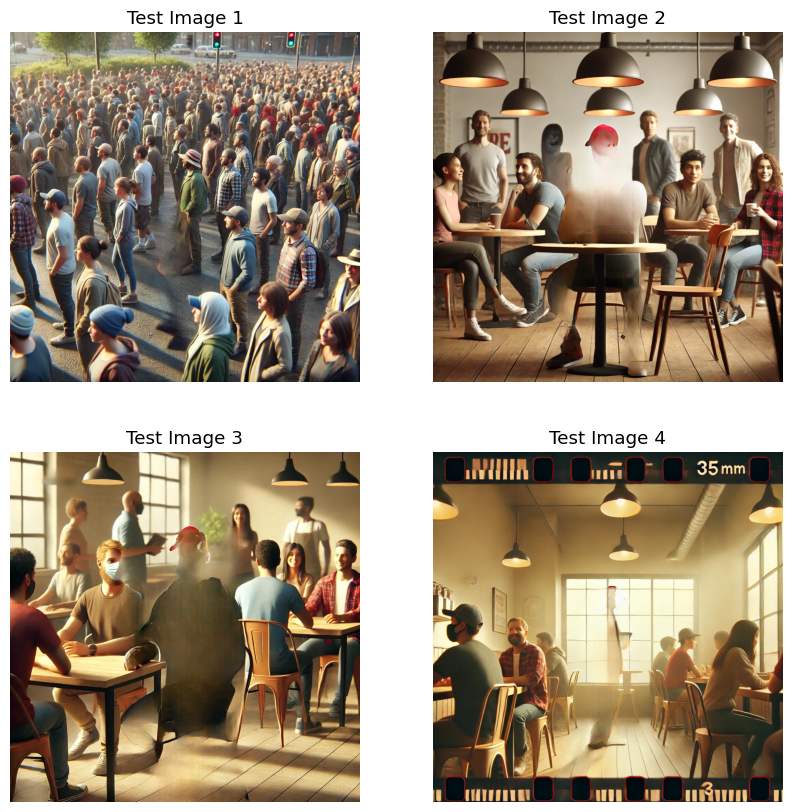

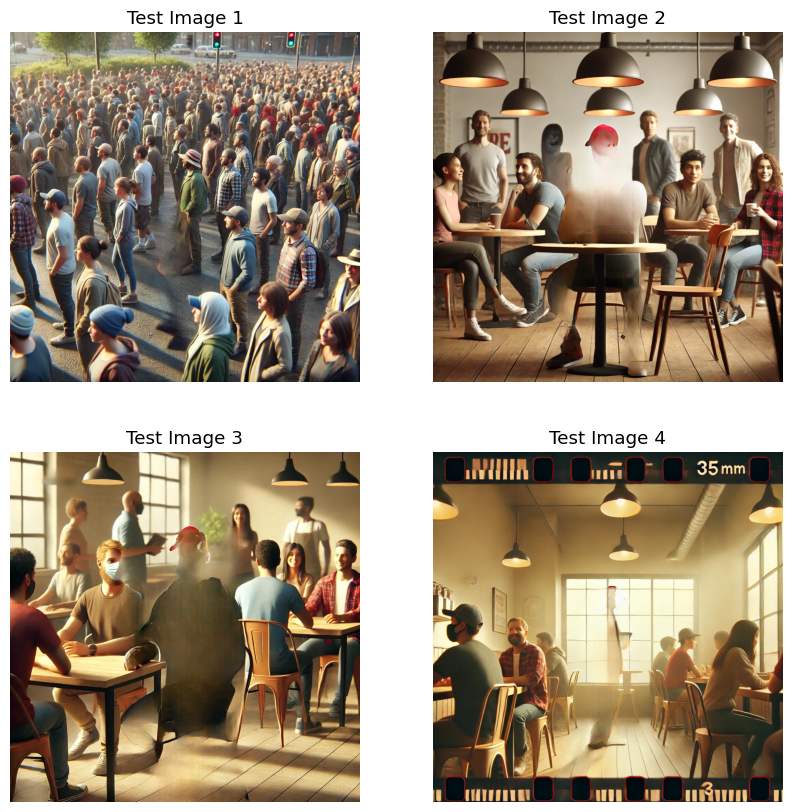

In [8]:
# Let's display the results in a unified manner
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(cv2.cvtColor(processed_image1, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 0].set_title('Test Image 1')

axs[0, 1].imshow(cv2.cvtColor(processed_image2, cv2.COLOR_BGR2RGB))
axs[0, 1].axis('off')
axs[0, 1].set_title('Test Image 2')

axs[1, 0].imshow(cv2.cvtColor(processed_image3, cv2.COLOR_BGR2RGB))
axs[1, 0].axis('off')
axs[1, 0].set_title('Test Image 3')

axs[1, 1].imshow(cv2.cvtColor(processed_image4, cv2.COLOR_BGR2RGB))
axs[1, 1].axis('off')
axs[1, 1].set_title('Test Image 4')

plt.show()

